This notebook showcases the performance of our final model Random Forest Classifier versus the Decision Tree Classifier on the preprocessed vehicle counts. This preprocessing is used to better represent real-time intersection counts.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv("Traffic.csv")
print(df.head())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


In [9]:
#get rid of the date in the time column
def convert_to_military_time(time_str):
    try:
        # Try to parse as 12-hour format
        return pd.to_datetime(time_str, format='%I:%M:%S %p').strftime('%H:%M:%S')
    except ValueError:
        return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')

df['Time'] = df['Time'].apply(convert_to_military_time)

#replace string attributes with numerical values in the Time column to use it in the model
df['Time'] = df['Time'].str.replace(':', '').astype(int)

# display new time column
print(df['Time'])

0            0
1         1500
2         3000
3         4500
4        10000
         ...  
2971    224500
2972    230000
2973    231500
2974    233000
2975    234500
Name: Time, Length: 2976, dtype: int32


In [10]:
import math
#divide all car counts and total by 10
#gives better presentation of real-time data
df['CarCount'] = df['CarCount'] / 10
df['TruckCount'] = df['TruckCount'] / 10
df['BusCount'] = df['BusCount'] / 10
df['BikeCount'] = df['BikeCount'] / 10  

#round all values to the nearest whole number
df['CarCount'] = df['CarCount'].apply(lambda x: math.ceil(x))
df['TruckCount'] = df['TruckCount'].apply(lambda x: math.ceil(x))
df['BusCount'] = df['BusCount'].apply(lambda x: math.ceil(x))
df['BikeCount'] = df['BikeCount'].apply(lambda x: math.ceil(x))

#sum all the counts to get the total
df['Total'] = df['CarCount'] + df['TruckCount'] + df['BusCount'] + df['BikeCount']

#display new values
print(df.head())

    Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0      0    10         Tuesday         4          0         1           1   
1   1500    10         Tuesday         5          0         1           1   
2   3000    10         Tuesday         5          0         1           1   
3   4500    10         Tuesday         6          0         1           1   
4  10000    10         Tuesday         6          1         2           2   

   Total Traffic Situation  
0      6               low  
1      7               low  
2      7               low  
3      8               low  
4     11            normal  


In [14]:
#label encoding - use this on categorical data
Le = LabelEncoder()
df['Day of the week'] = Le.fit_transform(df['Day of the week'])

#create our X and y variables for the model
X = df.drop(columns=["Traffic Situation"]) #features
y = df["Traffic Situation"] #target variable


#label encoding for the target variable
y = Le.fit_transform(y)

#print the encoded values mapped to the original values
print("Label Encoded Values for Traffic Situation:")
print(dict(zip(Le.transform(Le.classes_), Le.classes_)))

#show the value counts of the target variable
print(pd.Series(y).value_counts())
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Label Encoded Values for Traffic Situation:
{0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}
3    1669
0     682
1     321
2     304
Name: count, dtype: int64


Accuracy: 90.03%
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       197
           1       0.87      0.82      0.84        88
           2       0.79      0.63      0.70        93
           3       0.91      0.93      0.92       515

    accuracy                           0.90       893
   macro avg       0.87      0.84      0.85       893
weighted avg       0.90      0.90      0.90       893



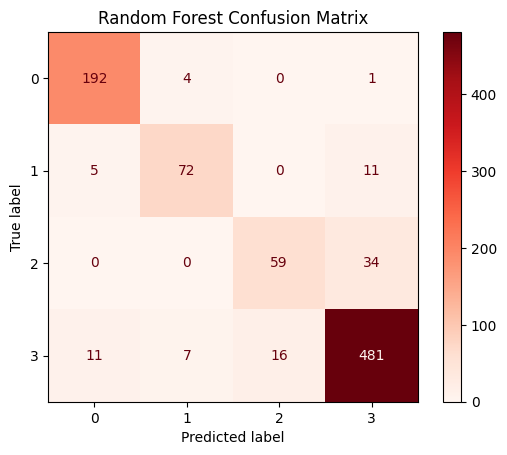

In [15]:
#train the model
model = RandomForestClassifier(random_state=42, n_estimators=1000, criterion="entropy", max_depth=10) 
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Random Forest Confusion Matrix")
plt.show()

Accuracy: 87.68%
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       197
           1       0.71      0.82      0.76        88
           2       0.74      0.72      0.73        93
           3       0.92      0.90      0.91       515

    accuracy                           0.88       893
   macro avg       0.82      0.84      0.83       893
weighted avg       0.88      0.88      0.88       893



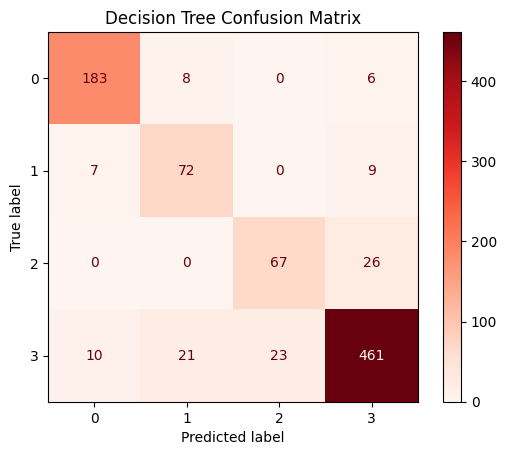

In [16]:
dt = DecisionTreeClassifier(random_state=42, max_depth=12)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.show()